# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 


# Import API key
from api_keys import openweather_api

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [80]:
print(openweather_api)

772cffbf826324b1116f5201a8631914


## Generate Cities List

In [105]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [158]:
for city in cities[:10]:
    print(city)

khatanga
mlonggo
hamilton
codrington
shakawe
aswan
turtas
ushuaia
udachnyy
cape town


In [141]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"

        
for city in cities: 
    try:
        query_url=base_url + "APPID=" + openweather_api + "&q=" + city 
        print(f"Checking weather for " + city)
        print("~~~~~~~~~~")
        weather_json = requests.get(query_url).json()
        print(f'The weather in ' + city + " is...")
        pprint(weather_json)
        print("~~~~~~~~~~")
    except: 
        print("Error! Moving onto next city")
        pass
#Wanderlandia error - {'cod': '404', 'message': 'city not found'}




Checking weather for khatanga
~~~~~~~~~~
The weather in khatanga is...
{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': 71.97, 'lon': 102.5},
 'dt': 1608004344,
 'id': 2022572,
 'main': {'feels_like': 237.2,
          'grnd_level': 1010,
          'humidity': 87,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 241.86,
          'temp_max': 241.86,
          'temp_min': 241.86},
 'name': 'Khatanga',
 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0},
 'timezone': 25200,
 'visibility': 3574,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 44, 'speed': 1.13}}
~~~~~~~~~~
Checking weather for mlonggo
~~~~~~~~~~
The weather in mlonggo is...
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -6.53, 'lon': 110.7},
 'dt': 1608004345,
 'id': 1635164,
 'main': {'feels_like': 305.3,
          'humidity': 74,
      

The weather in sangar is...
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 63.92, 'lon': 127.47},
 'dt': 1608004346,
 'id': 2017215,
 'main': {'feels_like': 223.72,
          'grnd_level': 1020,
          'humidity': 76,
          'pressure': 1031,
          'sea_level': 1031,
          'temp': 229.98,
          'temp_max': 229.98,
          'temp_min': 229.98},
 'name': 'Sangar',
 'sys': {'country': 'RU', 'sunrise': 1607994905, 'sunset': 1608010535},
 'timezone': 32400,
 'visibility': 4101,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 129, 'speed': 3.27}}
~~~~~~~~~~
Checking weather for provideniya
~~~~~~~~~~
The weather in provideniya is...
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 64.38, 'lon': -173.3},
 'dt': 1608004346,
 'id': 4031574,
 'main': {'feels_like': 255.64,
          'humidity': 72,
          'pressure

The weather in tiznit is...
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 29.58, 'lon': -9.5},
 'dt': 1608004347,
 'id': 2527087,
 'main': {'feels_like': 286.79,
          'grnd_level': 950,
          'humidity': 87,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 286.5,
          'temp_max': 286.5,
          'temp_min': 286.5},
 'name': 'Tiznit Province',
 'sys': {'country': 'MA', 'sunrise': 1608017141, 'sunset': 1608054065},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 183, 'speed': 0.15}}
~~~~~~~~~~
Checking weather for port alfred
~~~~~~~~~~
The weather in port alfred is...
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': -33.59, 'lon': 26.89},
 'dt': 1608004347,
 'id': 964432,
 'main': {'feels_like': 293.85,
          'humidity': 94,
          'pressu

The weather in albany is...
{'base': 'stations',
 'clouds': {'all': 31},
 'cod': 200,
 'coord': {'lat': 42.6, 'lon': -73.97},
 'dt': 1608004323,
 'id': 5106841,
 'main': {'feels_like': 270.68,
          'humidity': 70,
          'pressure': 1011,
          'temp': 273.82,
          'temp_max': 274.26,
          'temp_min': 273.15},
 'name': 'Albany',
 'sys': {'country': 'US',
         'id': 19530,
         'sunrise': 1607948318,
         'sunset': 1607980988,
         'type': 3},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 338, 'gust': 4.92, 'speed': 0.89}}
~~~~~~~~~~
Checking weather for bonito
~~~~~~~~~~
The weather in bonito is...
{'base': 'stations',
 'clouds': {'all': 23},
 'cod': 200,
 'coord': {'lat': -21.12, 'lon': -56.48},
 'dt': 1608004348,
 'id': 3469294,
 'main': {'feels_like': 297.14,
          'grnd_level': 973,
         

The weather in vila velha is...
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -20.33, 'lon': -40.29},
 'dt': 1608004095,
 'id': 3445026,
 'main': {'feels_like': 298.45,
          'humidity': 73,
          'pressure': 1013,
          'temp': 297.85,
          'temp_max': 298.15,
          'temp_min': 297.59},
 'name': 'Vila Velha',
 'sys': {'country': 'BR',
         'id': 8474,
         'sunrise': 1608018957,
         'sunset': 1608067033,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 10, 'speed': 4.1}}
~~~~~~~~~~
Checking weather for hilo
~~~~~~~~~~
The weather in hilo is...
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 19.73, 'lon': -155.09},
 'dt': 1608004349,
 'id': 5855927,
 'main': {'feels_like': 296.44,
          'humidity': 65,
          'pressure': 1015,
     

The weather in ixtapa is...
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 20.7, 'lon': -105.2},
 'dt': 1608004350,
 'id': 4004293,
 'main': {'feels_like': 299.17,
          'humidity': 83,
          'pressure': 1016,
          'temp': 296.15,
          'temp_max': 296.15,
          'temp_min': 296.15},
 'name': 'Ixtapa',
 'sys': {'country': 'MX',
         'id': 7156,
         'sunrise': 1607952559,
         'sunset': 1607991743,
         'type': 1},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 88, 'speed': 0.94}}
~~~~~~~~~~
Checking weather for saint-philippe
~~~~~~~~~~
The weather in saint-philippe is...
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -21.36, 'lon': 55.77},
 'dt': 1608004335,
 'id': 935215,
 'main': {'feels_like': 299.44,
          'humidity': 78,
          'pressu

The weather in nemuro is...
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 43.32, 'lon': 145.57},
 'dt': 1608004112,
 'id': 2128975,
 'main': {'feels_like': 262.39,
          'humidity': 36,
          'pressure': 997,
          'temp': 271.15,
          'temp_max': 271.15,
          'temp_min': 271.15},
 'name': 'Nemuro',
 'sys': {'country': 'JP',
         'id': 7976,
         'sunrise': 1607982192,
         'sunset': 1608014557,
         'type': 1},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 270, 'speed': 7.7}}
~~~~~~~~~~
Checking weather for lucea
~~~~~~~~~~
The weather in lucea is...
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 18.45, 'lon': -78.17},
 'dt': 1608004351,
 'id': 3489657,
 'main': {'feels_like': 300.62,
          'humidity': 78,
          'pressure': 1015,
    

The weather in cururupu is...
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -1.83, 'lon': -44.87},
 'dt': 1608004352,
 'id': 3401148,
 'main': {'feels_like': 301.82,
          'grnd_level': 1008,
          'humidity': 95,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 297.13,
          'temp_max': 297.13,
          'temp_min': 297.13},
 'name': 'Cururupu',
 'sys': {'country': 'BR', 'sunrise': 1608022088, 'sunset': 1608066101},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 67, 'speed': 0.9}}
~~~~~~~~~~
Checking weather for sinnamary
~~~~~~~~~~
The weather in sinnamary is...
{'base': 'stations',
 'clouds': {'all': 3},
 'cod': 200,
 'coord': {'lat': 5.38, 'lon': -52.95},
 'dt': 1608004352,
 'id': 3380290,
 'main': {'feels_like': 301.7,
          'grnd_level': 1010,
          'humidit

The weather in puerto ayora is...
{'base': 'stations',
 'clouds': {'all': 42},
 'cod': 200,
 'coord': {'lat': -0.74, 'lon': -90.35},
 'dt': 1608004353,
 'id': 3652764,
 'main': {'feels_like': 295.86,
          'humidity': 90,
          'pressure': 1014,
          'temp': 295.37,
          'temp_max': 295.37,
          'temp_min': 295.37},
 'name': 'Puerto Ayora',
 'sys': {'country': 'EC',
         'id': 2005652,
         'sunrise': 1607946692,
         'sunset': 1607990479,
         'type': 3},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 198, 'gust': 6.26, 'speed': 4.92}}
~~~~~~~~~~
Checking weather for cabo san lucas
~~~~~~~~~~
The weather in cabo san lucas is...
{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 22.89, 'lon': -109.91},
 'dt': 1608004326,
 'id': 3985710,
 'main': {'feels_like': 287.98,
        

The weather in khanu woralaksaburi is...
{'base': 'stations',
 'clouds': {'all': 25},
 'cod': 200,
 'coord': {'lat': 16.06, 'lon': 99.86},
 'dt': 1608004354,
 'id': 1152953,
 'main': {'feels_like': 305.95,
          'humidity': 58,
          'pressure': 1011,
          'temp': 303.71,
          'temp_max': 303.71,
          'temp_min': 303.71},
 'name': 'Khanu Woralaksaburi',
 'sys': {'country': 'TH',
         'id': 2021790,
         'sunrise': 1607989228,
         'sunset': 1608029468,
         'type': 3},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 13, 'speed': 3.02}}
~~~~~~~~~~
Checking weather for mar del plata
~~~~~~~~~~
The weather in mar del plata is...
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -38, 'lon': -57.56},
 'dt': 1608004354,
 'id': 3430863,
 'main': {'feels_like': 282.69,
          'humi

The weather in nanortalik is...
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 60.14, 'lon': -45.24},
 'dt': 1608004355,
 'id': 3421765,
 'main': {'feels_like': 270.55,
          'grnd_level': 1009,
          'humidity': 91,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 273.68,
          'temp_max': 273.68,
          'temp_min': 273.68},
 'name': 'Nanortalik',
 'sys': {'country': 'GL', 'sunrise': 1608033603, 'sunset': 1608054764},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 21, 'speed': 1.48}}
~~~~~~~~~~
Checking weather for roebourne
~~~~~~~~~~
The weather in roebourne is...
{'base': 'stations',
 'clouds': {'all': 55},
 'cod': 200,
 'coord': {'lat': -20.78, 'lon': 117.13},
 'dt': 1608004355,
 'id': 2062276,
 'main': {'feels_like': 303.6,
          'grnd_level': 1004,
          

The weather in mabaruma is...
{'base': 'stations',
 'clouds': {'all': 73},
 'cod': 200,
 'coord': {'lat': 8.2, 'lon': -59.78},
 'dt': 1608004356,
 'id': 3377301,
 'main': {'feels_like': 300.52,
          'grnd_level': 1009,
          'humidity': 98,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 295.95,
          'temp_max': 295.95,
          'temp_min': 295.95},
 'name': 'Mabaruma',
 'rain': {'1h': 0.19},
 'sys': {'country': 'GY', 'sunrise': 1607940279, 'sunset': 1607982214},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 123, 'speed': 0.55}}
~~~~~~~~~~
Checking weather for ust-kuyga
~~~~~~~~~~
The weather in ust-kuyga is...
{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': 70.02, 'lon': 135.6},
 'dt': 1608004356,
 'id': 2013921,
 'main': {'feels_like': 233.27,
          'grnd_level': 1019,
 

The weather in airai is...
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -8.93, 'lon': 125.41},
 'dt': 1608004357,
 'id': 1651810,
 'main': {'feels_like': 296.12,
          'grnd_level': 853,
          'humidity': 100,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 293.01,
          'temp_max': 293.01,
          'temp_min': 293.01},
 'name': 'Airai',
 'rain': {'1h': 2.28},
 'sys': {'country': 'TL', 'sunrise': 1607980464, 'sunset': 1608025964},
 'timezone': 32400,
 'visibility': 7585,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 258, 'speed': 0.75}}
~~~~~~~~~~
Checking weather for palabuhanratu
~~~~~~~~~~
The weather in palabuhanratu is...
{'cod': '404', 'message': 'city not found'}
~~~~~~~~~~
Checking weather for bonga
~~~~~~~~~~
The weather in bonga is...
{'base': 'stations',
 'clouds': {'all': 23},
 'cod': 200,
 'coord': {'

The weather in san juan is...
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -31.54, 'lon': -68.54},
 'dt': 1608004358,
 'id': 3837213,
 'main': {'feels_like': 294.78,
          'grnd_level': 937,
          'humidity': 24,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 299.72,
          'temp_max': 299.72,
          'temp_min': 299.72},
 'name': 'San Juan',
 'sys': {'country': 'AR', 'sunrise': 1608024235, 'sunset': 1608075320},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 208, 'speed': 5.27}}
~~~~~~~~~~
Checking weather for hofn
~~~~~~~~~~
The weather in hofn is...
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 64.25, 'lon': -15.21},
 'dt': 1608004359,
 'id': 2630299,
 'main': {'feels_like': 268.12,
          'grnd_level': 991,
          'humidity': 90,
      

The weather in esperance is...
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -33.87, 'lon': 121.9},
 'dt': 1608004359,
 'id': 2071860,
 'main': {'feels_like': 287.92,
          'humidity': 45,
          'pressure': 1022,
          'temp': 293.15,
          'temp_max': 293.15,
          'temp_min': 293.15},
 'name': 'Esperance',
 'sys': {'country': 'AU',
         'id': 9525,
         'sunrise': 1607978156,
         'sunset': 1608029958,
         'type': 1},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 160, 'speed': 6.7}}
~~~~~~~~~~
Checking weather for chuy
~~~~~~~~~~
The weather in chuy is...
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.7, 'lon': -53.46},
 'dt': 1608004360,
 'id': 3443061,
 'main': {'feels_like': 286.51,
          'grnd_level': 1007,
          'humidity': 64,
 

The weather in praya is...
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 14.92, 'lon': -23.51},
 'dt': 1608004360,
 'id': 3374333,
 'main': {'feels_like': 293.93,
          'humidity': 73,
          'pressure': 1013,
          'temp': 295.15,
          'temp_max': 295.15,
          'temp_min': 295.15},
 'name': 'Praia',
 'sys': {'country': 'CV',
         'id': 2462,
         'sunrise': 1608018722,
         'sunset': 1608059212,
         'type': 1},
 'timezone': -3600,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 30, 'speed': 5.1}}
~~~~~~~~~~
Checking weather for mitsamiouli
~~~~~~~~~~
The weather in mitsamiouli is...
{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': -11.38, 'lon': 43.28},
 'dt': 1608004361,
 'id': 921786,
 'main': {'feels_like': 303.43,
          'grnd_level': 1011,
          'humidity': 63,

The weather in la ciotat is...
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 43.17, 'lon': 5.6},
 'dt': 1608004361,
 'id': 3010025,
 'main': {'feels_like': 283.25,
          'humidity': 87,
          'pressure': 1019,
          'temp': 284.62,
          'temp_max': 284.82,
          'temp_min': 284.26},
 'name': 'La Ciotat',
 'sys': {'country': 'FR',
         'id': 2005095,
         'sunrise': 1608015770,
         'sunset': 1608048186,
         'type': 3},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 96, 'gust': 3.13, 'speed': 1.79}}
~~~~~~~~~~
Checking weather for cartagena
~~~~~~~~~~
The weather in cartagena is...
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 10.4, 'lon': -75.51},
 'dt': 1608004106,
 'id': 3687238,
 'main': {'feels_like': 305.71,
          'humidity': 100,
    

The weather in belem de sao francisco is...
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -8.75, 'lon': -38.97},
 'dt': 1608004362,
 'id': 3405852,
 'main': {'feels_like': 294.62,
          'grnd_level': 976,
          'humidity': 58,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 297.25,
          'temp_max': 297.25,
          'temp_min': 297.25},
 'name': 'Belém de São Francisco',
 'sys': {'country': 'BR', 'sunrise': 1608019946, 'sunset': 1608065410},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 115, 'speed': 6.23}}
~~~~~~~~~~
Checking weather for carnarvon
~~~~~~~~~~
The weather in carnarvon is...
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -24.87, 'lon': 113.63},
 'dt': 1608004345,
 'id': 2074865,
 'main': {'feels_like': 295.36,
          'humidi

The weather in olinda is...
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -8.01, 'lon': -34.86},
 'dt': 1608004364,
 'id': 3393536,
 'main': {'feels_like': 298.54,
          'humidity': 73,
          'pressure': 1012,
          'temp': 298.15,
          'temp_max': 298.15,
          'temp_min': 298.15},
 'name': 'Olinda',
 'sys': {'country': 'BR',
         'id': 8426,
         'sunrise': 1608019038,
         'sunset': 1608064345,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 140, 'speed': 4.6}}
~~~~~~~~~~
Checking weather for jalu
~~~~~~~~~~
The weather in jalu is...
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 29.03, 'lon': 21.55},
 'dt': 1608004364,
 'id': 86049,
 'main': {'feels_like': 281.04,
          'grnd_level': 1012,
          'humidity': 86,
         

The weather in dinsor is...
{'cod': '404', 'message': 'city not found'}
~~~~~~~~~~
Checking weather for lake havasu city
~~~~~~~~~~
The weather in lake havasu city is...
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 34.48, 'lon': -114.32},
 'dt': 1608004118,
 'id': 5301388,
 'main': {'feels_like': 281.09,
          'humidity': 22,
          'pressure': 1017,
          'temp': 287.15,
          'temp_max': 287.15,
          'temp_min': 287.15},
 'name': 'Lake Havasu City',
 'sys': {'country': 'US',
         'id': 4365,
         'sunrise': 1607956585,
         'sunset': 1607992095,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 360, 'gust': 7.7, 'speed': 4.6}}
~~~~~~~~~~
Checking weather for ponta do sol
~~~~~~~~~~
The weather in ponta do sol is...
{'base': 'stations',
 'clouds': {'all': 20},
 'cod'

The weather in sobolevo is...
{'base': 'stations',
 'clouds': {'all': 94},
 'cod': 200,
 'coord': {'lat': 54.43, 'lon': 31.9},
 'dt': 1608004366,
 'id': 525426,
 'main': {'feels_like': 265.89,
          'grnd_level': 997,
          'humidity': 99,
          'pressure': 1021,
          'sea_level': 1021,
          'temp': 270.06,
          'temp_max': 270.06,
          'temp_min': 270.06},
 'name': 'Sobolevo',
 'snow': {'1h': 0.3474},
 'sys': {'country': 'RU', 'sunrise': 1608012482, 'sunset': 1608038846},
 'timezone': 10800,
 'visibility': 2366,
 'weather': [{'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 315, 'speed': 2.51}}
~~~~~~~~~~
Checking weather for luganville
~~~~~~~~~~
The weather in luganville is...
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -15.53, 'lon': 167.17},
 'dt': 1608004366,
 'id': 2136150,
 'main': {'feels_like': 303.48,
          'grnd_level': 1004,

The weather in kahului is...
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 20.89, 'lon': -156.47},
 'dt': 1608004368,
 'id': 5847411,
 'main': {'feels_like': 292.7,
          'humidity': 57,
          'pressure': 1014,
          'temp': 296.66,
          'temp_max': 300.15,
          'temp_min': 294.26},
 'name': 'Kahului',
 'sys': {'country': 'US',
         'id': 7879,
         'sunrise': 1607964891,
         'sunset': 1608004028,
         'type': 1},
 'timezone': -36000,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 70, 'gust': 11.3, 'speed': 7.7}}
~~~~~~~~~~
Checking weather for faanui
~~~~~~~~~~
The weather in faanui is...
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': -16.48, 'lon': -151.75},
 'dt': 1608004368,
 'id': 4034551,
 'main': {'feels_like': 299.48,
          'grnd_level': 1003,
        

The weather in phan rang is...
{'cod': '404', 'message': 'city not found'}
~~~~~~~~~~
Checking weather for shimoda
~~~~~~~~~~
The weather in shimoda is...
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 34.67, 'lon': 138.95},
 'dt': 1608004369,
 'id': 1852357,
 'main': {'feels_like': 274.76,
          'humidity': 51,
          'pressure': 1009,
          'temp': 282.21,
          'temp_max': 284.15,
          'temp_min': 280.37},
 'name': 'Shimoda',
 'sys': {'country': 'JP',
         'id': 8070,
         'sunrise': 1607982241,
         'sunset': 1608017686,
         'type': 1},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'gust': 17, 'speed': 7.7}}
~~~~~~~~~~
Checking weather for maniitsoq
~~~~~~~~~~
The weather in maniitsoq is...
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 65.42,

The weather in viligili is...
{'cod': '404', 'message': 'city not found'}
~~~~~~~~~~
Checking weather for tabou
~~~~~~~~~~
The weather in tabou is...
{'base': 'stations',
 'clouds': {'all': 35},
 'cod': 200,
 'coord': {'lat': 4.42, 'lon': -7.35},
 'dt': 1608004370,
 'id': 2281120,
 'main': {'feels_like': 302.05,
          'grnd_level': 1008,
          'humidity': 86,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 298.77,
          'temp_max': 298.77,
          'temp_min': 298.77},
 'name': 'Tabou',
 'rain': {'1h': 0.52},
 'sys': {'country': 'CI', 'sunrise': 1608013727, 'sunset': 1608056447},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 180, 'speed': 2.88}}
~~~~~~~~~~
Checking weather for gravdal
~~~~~~~~~~
The weather in gravdal is...
{'base': 'stations',
 'clouds': {'all': 94},
 'cod': 200,
 'coord': {'lat': 68.12, 'lon'

The weather in santa cruz del sur is...
{'base': 'stations',
 'clouds': {'all': 23},
 'cod': 200,
 'coord': {'lat': 20.71, 'lon': -78},
 'dt': 1608004371,
 'id': 3537840,
 'main': {'feels_like': 298.03,
          'grnd_level': 1016,
          'humidity': 90,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 296.53,
          'temp_max': 296.53,
          'temp_min': 296.53},
 'name': 'Santa Cruz del Sur',
 'sys': {'country': 'CU', 'sunrise': 1607946029, 'sunset': 1607985212},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 59, 'speed': 4.31}}
~~~~~~~~~~
Checking weather for attawapiskat
~~~~~~~~~~
The weather in attawapiskat is...
{'cod': '404', 'message': 'city not found'}
~~~~~~~~~~
Checking weather for alotau
~~~~~~~~~~
The weather in alotau is...
{'cod': '404', 'message': 'city not found'}
~~~~~~~~~~
Checking weather

The weather in waitati is...
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -45.75, 'lon': 170.57},
 'dt': 1608004372,
 'id': 2179825,
 'main': {'feels_like': 291.47,
          'grnd_level': 1015,
          'humidity': 48,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 293.32,
          'temp_max': 293.32,
          'temp_min': 293.32},
 'name': 'Waitati',
 'sys': {'country': 'NZ', 'sunrise': 1607964138, 'sunset': 1608020607},
 'timezone': 46800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 78, 'speed': 2.26}}
~~~~~~~~~~
Checking weather for tuatapere
~~~~~~~~~~
The weather in tuatapere is...
{'base': 'stations',
 'clouds': {'all': 13},
 'cod': 200,
 'coord': {'lat': -46.13, 'lon': 167.68},
 'dt': 1608004372,
 'id': 2180815,
 'main': {'feels_like': 287.37,
          'humidity': 72,
          'pressure': 1019,


The weather in hithadhoo is...
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -0.6, 'lon': 73.08},
 'dt': 1608004372,
 'id': 1282256,
 'main': {'feels_like': 301.89,
          'grnd_level': 1012,
          'humidity': 74,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 300.56,
          'temp_max': 300.56,
          'temp_min': 300.56},
 'name': 'Hithadhoo',
 'sys': {'country': 'MV', 'sunrise': 1607993899, 'sunset': 1608037656},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 306, 'speed': 5.08}}
~~~~~~~~~~
Checking weather for kaupanger
~~~~~~~~~~
The weather in kaupanger is...
{'base': 'stations',
 'clouds': {'all': 69},
 'cod': 200,
 'coord': {'lat': 61.18, 'lon': 7.24},
 'dt': 1608004373,
 'id': 7288345,
 'main': {'feels_like': 272.55,
          'humidity': 93,
          'pressure': 1000

The weather in lakes entrance is...
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -37.88, 'lon': 147.98},
 'dt': 1608004374,
 'id': 2160735,
 'main': {'feels_like': 304.81,
          'humidity': 26,
          'pressure': 1007,
          'temp': 307.59,
          'temp_max': 307.59,
          'temp_min': 307.59},
 'name': 'Lakes Entrance',
 'sys': {'country': 'AU',
         'id': 2003486,
         'sunrise': 1607971213,
         'sunset': 1608024379,
         'type': 3},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 127, 'gust': 7.15, 'speed': 4.92}}
~~~~~~~~~~
Checking weather for camopi
~~~~~~~~~~
The weather in camopi is...
{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 3.17, 'lon': -52.32},
 'dt': 1608004374,
 'id': 3382226,
 'main': {'feels_like': 299.77,
          'grnd_level': 1003,


The weather in zabid is...
{'base': 'stations',
 'clouds': {'all': 72},
 'cod': 200,
 'coord': {'lat': 14.2, 'lon': 43.32},
 'dt': 1608004375,
 'id': 69500,
 'main': {'feels_like': 295.21,
          'grnd_level': 1003,
          'humidity': 67,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 295.76,
          'temp_max': 295.76,
          'temp_min': 295.76},
 'name': 'Zabid',
 'sys': {'country': 'YE', 'sunrise': 1608002598, 'sunset': 1608043247},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 177, 'speed': 3.72}}
~~~~~~~~~~
Checking weather for zhezkazgan
~~~~~~~~~~
The weather in zhezkazgan is...
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 47.8, 'lon': 67.71},
 'dt': 1608004375,
 'id': 1516589,
 'main': {'feels_like': 247.74,
          'humidity': 76,
          'pressure': 1036,
   

The weather in grand-santi is...
{'base': 'stations',
 'clouds': {'all': 11},
 'cod': 200,
 'coord': {'lat': 4.25, 'lon': -54.38},
 'dt': 1608004376,
 'id': 3381538,
 'main': {'feels_like': 299.6,
          'grnd_level': 1004,
          'humidity': 97,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 295.61,
          'temp_max': 295.61,
          'temp_min': 295.61},
 'name': 'Grand-Santi',
 'sys': {'country': 'GF', 'sunrise': 1608025000, 'sunset': 1608067755},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 41, 'speed': 0.99}}
~~~~~~~~~~
Checking weather for muros
~~~~~~~~~~
The weather in muros is...
{'base': 'stations',
 'clouds': {'all': 34},
 'cod': 200,
 'coord': {'lat': 42.78, 'lon': -9.06},
 'dt': 1608004362,
 'id': 3115824,
 'main': {'feels_like': 280.73,
          'humidity': 87,
          'pressure': 1010,
 

The weather in kedrovyy is...
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 56.17, 'lon': 91.82},
 'dt': 1608004377,
 'id': 1538641,
 'main': {'feels_like': 258.82,
          'humidity': 73,
          'pressure': 1018,
          'temp': 266.15,
          'temp_max': 266.15,
          'temp_min': 266.15},
 'name': 'Kedrovyy',
 'snow': {'1h': 0.31},
 'sys': {'country': 'RU',
         'id': 8957,
         'sunrise': 1607998762,
         'sunset': 1608023795,
         'type': 1},
 'timezone': 25200,
 'visibility': 4100,
 'weather': [{'description': 'light shower snow',
              'icon': '13d',
              'id': 620,
              'main': 'Snow'}],
 'wind': {'deg': 260, 'gust': 11, 'speed': 6}}
~~~~~~~~~~
Checking weather for hambantota
~~~~~~~~~~
The weather in hambantota is...
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 6.12, 'lon': 81.12},
 'dt': 1608004357,
 'id': 1244926,
 'main': {'feels_like': 303.63,
          'humi

The weather in stornoway is...
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 58.21, 'lon': -6.39},
 'dt': 1608004378,
 'id': 2636790,
 'main': {'feels_like': 273.24,
          'humidity': 81,
          'pressure': 986,
          'temp': 282.1,
          'temp_max': 282.15,
          'temp_min': 282.04},
 'name': 'Stornoway',
 'rain': {'1h': 1},
 'sys': {'country': 'GB',
         'id': 1450,
         'sunrise': 1608023253,
         'sunset': 1608046460,
         'type': 1},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 180, 'speed': 11.3}}
~~~~~~~~~~
Checking weather for gravelbourg
~~~~~~~~~~
The weather in gravelbourg is...
{'base': 'stations',
 'clouds': {'all': 34},
 'cod': 200,
 'coord': {'lat': 49.88, 'lon': -106.55},
 'dt': 1608004378,
 'id': 5965462,
 'main': {'feels_like': 249.6,
          'grnd_level': 936,
    

The weather in christchurch is...
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -43.53, 'lon': 172.63},
 'dt': 1608004194,
 'id': 2192362,
 'main': {'feels_like': 289.25,
          'humidity': 36,
          'pressure': 1017,
          'temp': 295.45,
          'temp_max': 297.15,
          'temp_min': 294.26},
 'name': 'Christchurch',
 'sys': {'country': 'NZ',
         'id': 7348,
         'sunrise': 1607964163,
         'sunset': 1608019593,
         'type': 1},
 'timezone': 46800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 80, 'speed': 7.7}}
~~~~~~~~~~
Checking weather for hami
~~~~~~~~~~
The weather in hami is...
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 42.8, 'lon': 93.45},
 'dt': 1608004379,
 'id': 1529484,
 'main': {'feels_like': 261.15,
          'grnd_level': 948,
          'humidity': 69,
    

The weather in kargil is...
{'base': 'stations',
 'clouds': {'all': 74},
 'cod': 200,
 'coord': {'lat': 34.57, 'lon': 76.1},
 'dt': 1608004380,
 'id': 1267776,
 'main': {'feels_like': 256.32,
          'grnd_level': 670,
          'humidity': 62,
          'pressure': 1033,
          'sea_level': 1033,
          'temp': 260.4,
          'temp_max': 260.4,
          'temp_min': 260.4},
 'name': 'Kargil',
 'sys': {'country': 'IN', 'sunrise': 1607997316, 'sunset': 1608032789},
 'timezone': 19800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 191, 'speed': 0.79}}
~~~~~~~~~~
Checking weather for oranjemund
~~~~~~~~~~
The weather in oranjemund is...
{'base': 'stations',
 'clouds': {'all': 72},
 'cod': 200,
 'coord': {'lat': -28.55, 'lon': 16.43},
 'dt': 1608004380,
 'id': 3354071,
 'main': {'feels_like': 286.24,
          'grnd_level': 1012,
          'humidity': 86,

The weather in hay river is...
{'base': 'stations',
 'clouds': {'all': 51},
 'cod': 200,
 'coord': {'lat': 60.82, 'lon': -115.8},
 'dt': 1608004381,
 'id': 5972762,
 'main': {'feels_like': 235.54,
          'grnd_level': 1002,
          'humidity': 67,
          'pressure': 1024,
          'sea_level': 1024,
          'temp': 240.16,
          'temp_max': 241.15,
          'temp_min': 239.15},
 'name': 'Hay River',
 'sys': {'country': 'CA',
         'id': 1036,
         'sunrise': 1607964494,
         'sunset': 1607984897,
         'type': 1},
 'timezone': -25200,
 'visibility': 6020,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 190, 'speed': 1}}
~~~~~~~~~~
Checking weather for lata
~~~~~~~~~~
The weather in lata is...
{'base': 'stations',
 'clouds': {'all': 4},
 'cod': 200,
 'coord': {'lat': 40.16, 'lon': -8.33},
 'dt': 1608004381,
 'id': 2738381,
 'main': {'feels_like': 281.62,
 

The weather in matagami is...
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 49.75, 'lon': -77.63},
 'dt': 1608004382,
 'id': 6067747,
 'main': {'feels_like': 243.99,
          'humidity': 77,
          'pressure': 1014,
          'temp': 254.15,
          'temp_max': 254.15,
          'temp_min': 254.15},
 'name': 'Matagami',
 'sys': {'country': 'CA',
         'id': 866,
         'sunrise': 1607950864,
         'sunset': 1607980199,
         'type': 1},
 'timezone': -18000,
 'visibility': 3621,
 'weather': [{'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 300, 'gust': 13.4, 'speed': 9.3}}
~~~~~~~~~~
Checking weather for axim
~~~~~~~~~~
The weather in axim is...
{'base': 'stations',
 'clouds': {'all': 27},
 'cod': 200,
 'coord': {'lat': 4.87, 'lon': -2.24},
 'dt': 1608004382,
 'id': 2303611,
 'main': {'feels_like': 302.04,
          'grnd_level': 1007,
          'humidity': 

The weather in okha is...
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 53.57, 'lon': 142.95},
 'dt': 1608004361,
 'id': 2122614,
 'main': {'feels_like': 252.87,
          'grnd_level': 994,
          'humidity': 94,
          'pressure': 996,
          'sea_level': 996,
          'temp': 264.79,
          'temp_max': 264.79,
          'temp_min': 264.79},
 'name': 'Okha',
 'snow': {'1h': 0.13},
 'sys': {'country': 'RU', 'sunrise': 1607985512, 'sunset': 1608012495},
 'timezone': 39600,
 'visibility': 1064,
 'weather': [{'description': 'light snow',
              'icon': '13d',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 333, 'speed': 12.75}}
~~~~~~~~~~
Checking weather for yangambi
~~~~~~~~~~
The weather in yangambi is...
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 0.81, 'lon': 24.43},
 'dt': 1608004383,
 'id': 203717,
 'main': {'feels_like': 297.29,
          'grnd_level': 960,
          'hum

The weather in touros is...
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -5.2, 'lon': -35.46},
 'dt': 1608004384,
 'id': 3386213,
 'main': {'feels_like': 301.5,
          'humidity': 88,
          'pressure': 1012,
          'temp': 298.15,
          'temp_max': 298.15,
          'temp_min': 298.15},
 'name': 'Touros',
 'sys': {'country': 'BR',
         'id': 8452,
         'sunrise': 1608019479,
         'sunset': 1608064193,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'speed': 2.6}}
~~~~~~~~~~
Checking weather for wanning
~~~~~~~~~~
The weather in wanning is...
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 18.8, 'lon': 110.4},
 'dt': 1608004384,
 'id': 1791779,
 'main': {'feels_like': 292.33,
          'grnd_level': 1019,
          'humidity': 86,

The weather in ofaqim is...
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 31.31, 'lon': 34.62},
 'dt': 1608004385,
 'id': 293992,
 'main': {'feels_like': 278.96,
          'humidity': 36,
          'pressure': 1009,
          'temp': 284.82,
          'temp_max': 284.82,
          'temp_min': 284.82},
 'name': 'Ofakim',
 'sys': {'country': 'IL',
         'id': 2002441,
         'sunrise': 1608006790,
         'sunset': 1608043231,
         'type': 3},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 185, 'speed': 4.98}}
~~~~~~~~~~
Checking weather for inta
~~~~~~~~~~
The weather in inta is...
{'base': 'stations',
 'clouds': {'all': 82},
 'cod': 200,
 'coord': {'lat': 66.03, 'lon': 60.17},
 'dt': 1608004385,
 'id': 1505579,
 'main': {'feels_like': 251.02,
          'grnd_level': 1018,
          'humidity': 94,
          'p

The weather in santo domingo is...
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 18.5, 'lon': -69.99},
 'dt': 1608004189,
 'id': 3492908,
 'main': {'feels_like': 301.33,
          'humidity': 100,
          'pressure': 1015,
          'temp': 296.78,
          'temp_max': 297.15,
          'temp_min': 296.48},
 'name': 'Santo Domingo',
 'sys': {'country': 'DO',
         'id': 7077,
         'sunrise': 1607943850,
         'sunset': 1607983545,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 30, 'speed': 1.5}}
~~~~~~~~~~
Checking weather for sungairaya
~~~~~~~~~~
The weather in sungairaya is...
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 0.7, 'lon': 108.9},
 'dt': 1608004386,
 'id': 1625908,
 'main': {'feels_like': 307.94,
          'grnd_level': 1009,
          '

The weather in cody is...
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 44.53, 'lon': -109.06},
 'dt': 1608004387,
 'id': 5821593,
 'main': {'feels_like': 266.56,
          'humidity': 79,
          'pressure': 1018,
          'temp': 270.32,
          'temp_max': 270.37,
          'temp_min': 270.15},
 'name': 'Cody',
 'sys': {'country': 'US',
         'id': 3669,
         'sunrise': 1607957145,
         'sunset': 1607989010,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 1.5}}
~~~~~~~~~~
Checking weather for labytnangi
~~~~~~~~~~
The weather in labytnangi is...
{'base': 'stations',
 'clouds': {'all': 33},
 'cod': 200,
 'coord': {'lat': 66.66, 'lon': 66.42},
 'dt': 1608004128,
 'id': 1500933,
 'main': {'feels_like': 242.79,
          'grnd_level': 1026,
          'humidity':

The weather in half moon bay is...
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 37.46, 'lon': -122.43},
 'dt': 1608004388,
 'id': 5354943,
 'main': {'feels_like': 279.2,
          'humidity': 87,
          'pressure': 1026,
          'temp': 281.49,
          'temp_max': 283.71,
          'temp_min': 280.37},
 'name': 'Half Moon Bay',
 'sys': {'country': 'US',
         'id': 4322,
         'sunrise': 1607959013,
         'sunset': 1607993561,
         'type': 1},
 'timezone': -28800,
 'visibility': 9656,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 328, 'speed': 2.06}}
~~~~~~~~~~
Checking weather for rungata
~~~~~~~~~~
The weather in rungata is...
{'cod': '404', 'message': 'city not found'}
~~~~~~~~~~
Checking weather for xambioa
~~~~~~~~~~
The weather in xambioa is...
{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -6.41, 'lon': -48.54},
 'dt': 1608004388,
 'id': 3384940,
 '

The weather in ancud is...
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -41.87, 'lon': -73.82},
 'dt': 1608004389,
 'id': 3899695,
 'main': {'feels_like': 275.56,
          'humidity': 81,
          'pressure': 1021,
          'temp': 278.62,
          'temp_max': 280.37,
          'temp_min': 275.93},
 'name': 'Ancud',
 'sys': {'country': 'CL',
         'id': 8512,
         'sunrise': 1608023678,
         'sunset': 1608078412,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 190, 'speed': 2.1}}
~~~~~~~~~~
Checking weather for qaqortoq
~~~~~~~~~~
The weather in qaqortoq is...
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 60.72, 'lon': -46.03},
 'dt': 1608004371,
 'id': 3420846,
 'main': {'feels_like': 270.38,
          'humidity': 32,
          'pressure': 1007,

The weather in lhokseumawe is...
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 5.18, 'lon': 97.15},
 'dt': 1608004391,
 'id': 1214658,
 'main': {'feels_like': 304.3,
          'grnd_level': 1011,
          'humidity': 76,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 300.76,
          'temp_max': 300.76,
          'temp_min': 300.76},
 'name': 'Lhokseumawe',
 'rain': {'1h': 0.67},
 'sys': {'country': 'ID', 'sunrise': 1607988717, 'sunset': 1608031280},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 284, 'speed': 2.42}}
~~~~~~~~~~
Checking weather for solnechnyy
~~~~~~~~~~
The weather in solnechnyy is...
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 50.72, 'lon': 136.63},
 'dt': 1608004391,
 'id': 2016307,
 'main': {'feels_like': 253.43,
          'grnd_level'

The weather in wenling is...
{'base': 'stations',
 'clouds': {'all': 87},
 'cod': 200,
 'coord': {'lat': 28.37, 'lon': 121.36},
 'dt': 1608004391,
 'id': 1791464,
 'main': {'feels_like': 272.98,
          'humidity': 64,
          'pressure': 1019,
          'temp': 279.82,
          'temp_max': 279.82,
          'temp_min': 279.82},
 'name': 'Wenling',
 'sys': {'country': 'CN',
         'id': 268031,
         'sunrise': 1607985557,
         'sunset': 1608022816,
         'type': 3},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 355, 'speed': 7.01}}
~~~~~~~~~~
Checking weather for quime
~~~~~~~~~~
The weather in quime is...
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -16.98, 'lon': -67.22},
 'dt': 1608004392,
 'id': 3906765,
 'main': {'feels_like': 283.75,
          'grnd_level': 718,
          'humidity': 

The weather in vermillion is...
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 42.78, 'lon': -96.93},
 'dt': 1608004392,
 'id': 5232592,
 'main': {'feels_like': 259.59,
          'humidity': 72,
          'pressure': 1026,
          'temp': 265.31,
          'temp_max': 265.93,
          'temp_min': 264.82},
 'name': 'Vermillion',
 'sys': {'country': 'US',
         'id': 6329,
         'sunrise': 1607953868,
         'sunset': 1607986463,
         'type': 1},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 100, 'speed': 3.6}}
~~~~~~~~~~
Checking weather for port-gentil
~~~~~~~~~~
The weather in port-gentil is...
{'base': 'stations',
 'clouds': {'all': 29},
 'cod': 200,
 'coord': {'lat': -0.72, 'lon': 8.78},
 'dt': 1608004393,
 'id': 2396518,
 'main': {'feels_like': 301.49,
          'grnd_level': 1009,
        

The weather in havre is...
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 49.58, 'lon': 0.33},
 'dt': 1608004394,
 'id': 3013633,
 'main': {'feels_like': 279.15,
          'humidity': 93,
          'pressure': 1005,
          'temp': 282.15,
          'temp_max': 282.15,
          'temp_min': 282.15},
 'name': 'Arrondissement du Havre',
 'sys': {'country': 'FR',
         'id': 6533,
         'sunrise': 1608018545,
         'sunset': 1608047942,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 190, 'speed': 3.6}}
~~~~~~~~~~
Checking weather for dongsheng
~~~~~~~~~~
The weather in dongsheng is...
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 39.82, 'lon': 109.98},
 'dt': 1608004394,
 'id': 1812256,
 'main': {'feels_like': 254.77,
          'grnd_level': 865,
         

The weather in lai is...
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 9.4, 'lon': 16.3},
 'dt': 1608004395,
 'id': 2429296,
 'main': {'feels_like': 290.18,
          'grnd_level': 968,
          'humidity': 24,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 293.66,
          'temp_max': 293.66,
          'temp_min': 293.66},
 'name': 'Laï',
 'sys': {'country': 'TD', 'sunrise': 1608008569, 'sunset': 1608050249},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 349, 'speed': 1.98}}
~~~~~~~~~~
Checking weather for truro
~~~~~~~~~~
The weather in truro is...
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 50.27, 'lon': -5.05},
 'dt': 1608004395,
 'id': 2635412,
 'main': {'feels_like': 277.55,
          'humidity': 87,
          'pressure': 999,
          'temp': 281.6,
 

The weather in houston is...
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 29.76, 'lon': -95.36},
 'dt': 1608004113,
 'id': 4699066,
 'main': {'feels_like': 277.57,
          'humidity': 81,
          'pressure': 1021,
          'temp': 280.63,
          'temp_max': 281.48,
          'temp_min': 279.82},
 'name': 'Houston',
 'sys': {'country': 'US',
         'id': 4850,
         'sunrise': 1607951344,
         'sunset': 1607988232,
         'type': 1},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 0, 'speed': 2.6}}
~~~~~~~~~~
Checking weather for vila franca do campo
~~~~~~~~~~
The weather in vila franca do campo is...
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 37.72, 'lon': -25.43},
 'dt': 1608004371,
 'id': 3372472,
 'main': {'feels_like': 281.9,
          'humidity': 72,
  

The weather in anito is...
{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': 12.45, 'lon': 125.29},
 'dt': 1608004397,
 'id': 1730622,
 'main': {'feels_like': 304.11,
          'grnd_level': 1011,
          'humidity': 83,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 300.96,
          'temp_max': 300.96,
          'temp_min': 300.96},
 'name': 'Anito',
 'sys': {'country': 'PH', 'sunrise': 1607982728, 'sunset': 1608023758},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 75, 'speed': 4.37}}
~~~~~~~~~~
Checking weather for senmonorom
~~~~~~~~~~
The weather in senmonorom is...
{'cod': '404', 'message': 'city not found'}
~~~~~~~~~~
Checking weather for mahadday weyne
~~~~~~~~~~
The weather in mahadday weyne is...
{'cod': '404', 'message': 'city not found'}
~~~~~~~~~~


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [149]:
city_df = pd.DataFrame()
city_df["City"]= ""
city_df["Lat"]=""
city_df["Lng"]=""
city_df["Max Temp"]=""
city_df["Cloudiness"]=""
city_df["Humidity"]=""
city_df["Wind Speed"]=""
city_df["Date"]=""


city_df.head()

,City,Lat,Lng,Max Temp,Cloudiness,Humidity,Wind Speed,Date


In [156]:
for city in cities: 
    try:
        query_url=base_url + "APPID=" + openweather_api + "&q=" + city 
        weather_json = requests.get(query_url).json()
        city_name = weather_json['name']
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_maxtemp= weather_json['main']['temp_max']
        city_clouds = weather_json['clouds']['all']
        city_humidity = weather_json['main']['humidity']
        city_wind = weather_json['wind']['speed']
        city_date = weather_json['dt']
        city_df.append({"City": city_name, "Lat": city_lat, "Lng": city_lng, "Max Temp": city_maxtemp, "Cloudiness": city_clouds,
                       "Humidity": city_humidity, "Wind Speed":city_wind, "Date":city_date})
        
    except(KeyError): 
        print("City not found. Moving onto next city")
        pass

City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not fou

City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not fou

City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not found. Moving onto next city
City not fou

In [155]:
city_df.head()

,City,Lat,Lng,Max Temp,Cloudiness,Humidity,Wind Speed,Date


In [137]:
for index, row in city_df.iterrows():  
    city_df.loc[index, 'Lat'] = weather_json[0]['coord']['lat']
    city_df.loc[index, 'Lon'] = weather_json[0]['coord']['lon']
    city_df.loc[index, 'Max Temp'] = weather_json[0]['main']['temp_max']
    city_df.loc[index, 'Cloudiness'] = weather_json[0]['clouds']['all']
    city_df.loc[index, 'Humidity'] = weather_json[0]['main']['humidity']
    city_df.loc[index, 'Wind Speed'] = weather_json[0]['wind']['speed']
        
    #except (KeyError, IndexError): 
      #  print ("Error! Missing Value! Next City...")


KeyError: 0

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

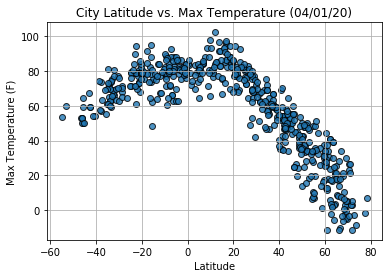

## Latitude vs. Humidity Plot

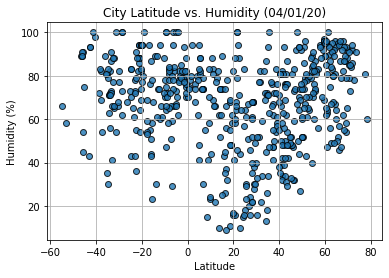

## Latitude vs. Cloudiness Plot

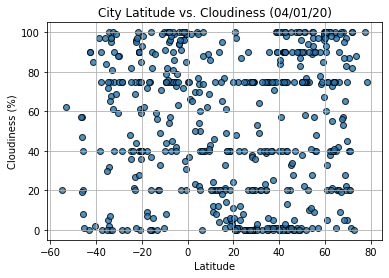

## Latitude vs. Wind Speed Plot

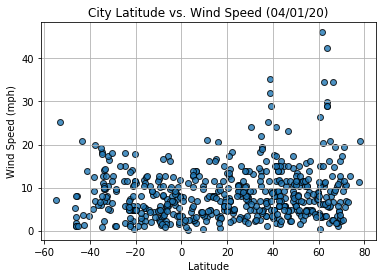

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


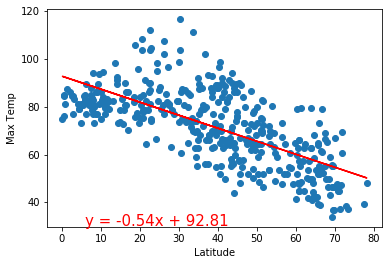

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


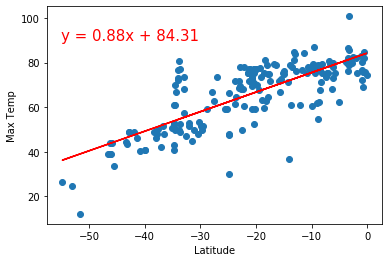

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


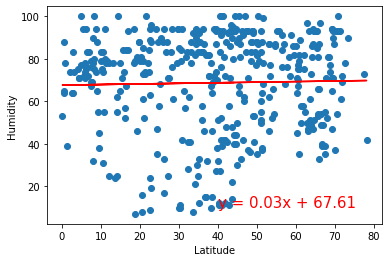

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


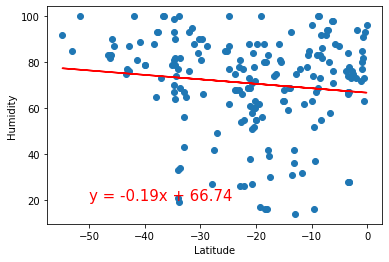

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


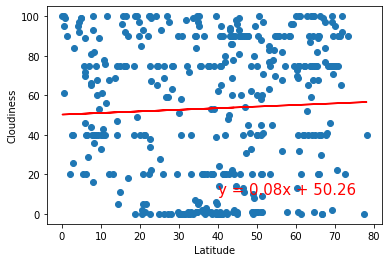

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


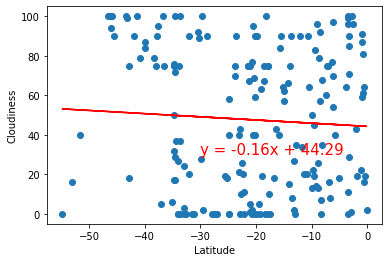

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


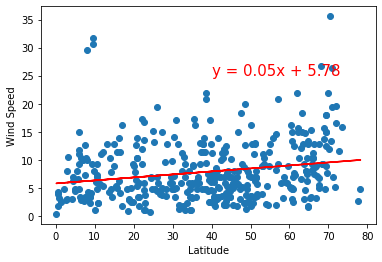

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


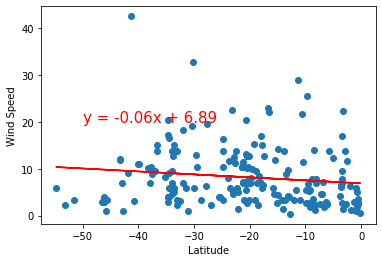